In [1]:
# Suppress warnings
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn



# Load essential libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
import io
df = pd.read_csv("Corrosion dataset.csv")

#  Step 1: Show initial shape and preview
print("Initial Shape:", df.shape)
display(df.head())

#  Step 2: Identify columns with constant values
nunique = df.nunique()
constant_columns = nunique[nunique == 1].index.tolist()
print("Dropped Constant Columns:", constant_columns)

# Step 3: Drop constant columns
df_cleaned = df.drop(columns=constant_columns)

# 🎯 Step 4: Separate features and target
target_col = "Corrosion rate"
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]

# 🧩 Step 5: Impute missing values with mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 📏 Step 6: Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_imputed)

# 🎯 Step 7: Scale target
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# ✅ Final shapes
print("Final Shape (Features):", X_scaled.shape)
print("Final Shape (Target):", y_scaled.shape)

# 🧾 Summary
print("\n✅ Dataset Preprocessing Complete!")
print(f"Dropped Columns: {constant_columns}")
print(f"Missing Values after Imputation: {np.isnan(X_scaled).sum()}")

Initial Shape: (306, 25)


,Si,Mn,P,S,Al,Cu,Cr,Ni,ELEMENTS,T_MAX,...,TOW,PRECIPIT,WIND_MAX,WIND_AVE,SOLAR,UV,CHLORIDE,SO2,TIME,Corrosion rate
0,0.003,0.003,0.0006,0.0007,0.001,0.009,0.005,0.003,0.0253,35.0,...,4670.0,1344.5,12.0,2.5,5740.0,246.9,3.3,5.3,1,0.0161
1,0.003,0.003,0.0006,0.0007,0.001,0.009,0.005,0.003,0.0253,32.2,...,4908.6,1511.5,16.1,3.5,4193.3,301.7,32.3,5.1,1,0.0484
2,0.003,0.003,0.0006,0.0007,0.001,0.009,0.005,0.003,0.0253,33.4,...,5248.6,2314.0,20.9,4.7,5229.0,338.1,45.8,2.1,1,0.0583
3,0.003,0.003,0.0006,0.0007,0.001,0.009,0.005,0.003,0.0253,35.9,...,4670.0,1138.5,14.0,2.3,5740.0,246.9,3.3,5.3,2,0.0132
4,0.003,0.003,0.0006,0.0007,0.001,0.009,0.005,0.003,0.0253,32.4,...,4835.0,1484.8,15.8,3.4,4352.0,307.2,31.2,5.5,2,0.0445


Dropped Constant Columns: ['Al']
Final Shape (Features): (306, 23)
Final Shape (Target): (306,)

✅ Dataset Preprocessing Complete!
Dropped Columns: ['Al']
Missing Values after Imputation: 0


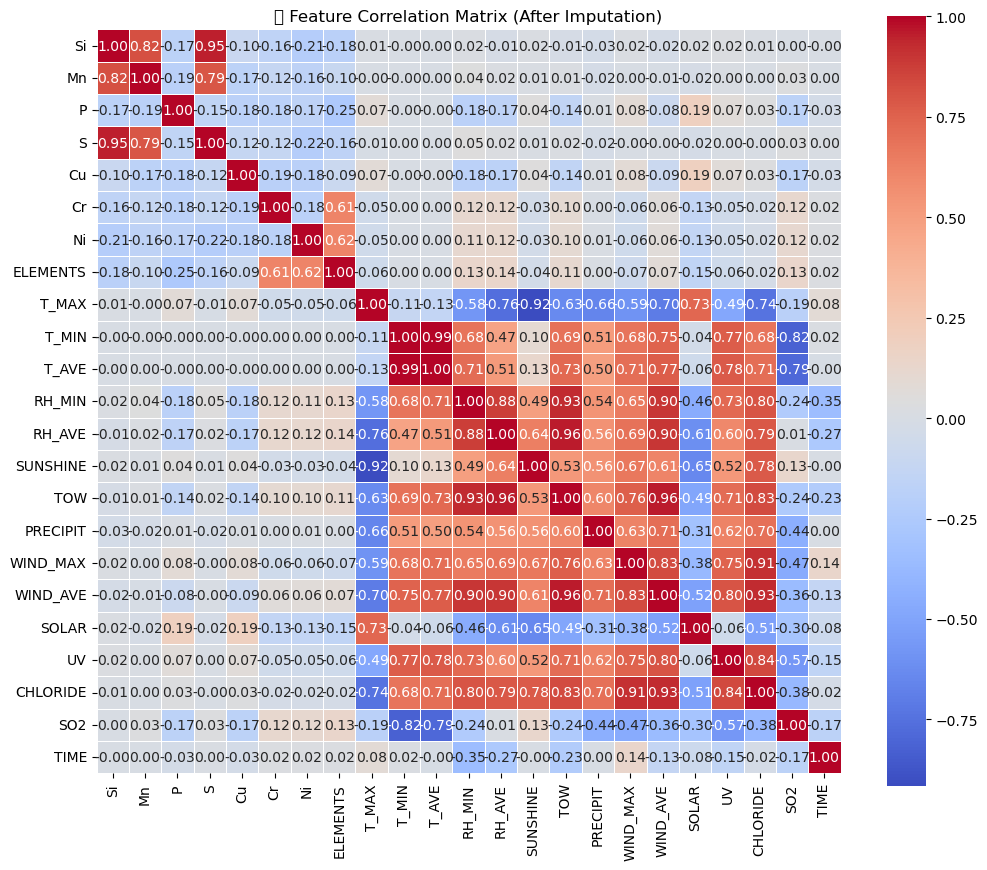

In [2]:
# Store original feature names
import matplotlib.pyplot as plt
import seaborn as sns
feature_columns = df_cleaned.drop(columns=[target_col]).columns

# Create DataFrame from imputed data
X_df = pd.DataFrame(X_imputed, columns=feature_columns)

# Compute correlation matrix
correlation_matrix = X_df.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title("🔗 Feature Correlation Matrix (After Imputation)")
plt.show()


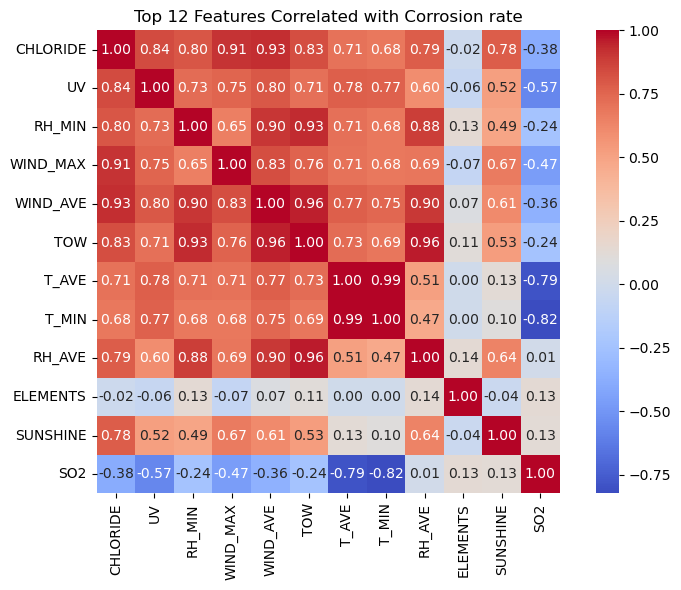

In [3]:


# Compute Pearson correlation matrix
corr_matrix = df.corr(method='pearson')

# Select the top 5 features most correlated with 'Vickers_Hardness' (excluding itself)
target_col = 'Corrosion rate'
top_features = corr_matrix[target_col].drop(target_col).abs().sort_values(ascending=False).head(12).index.tolist()

# Add the target column back for sub-matrix
top_corr_features = top_features
top_corr_matrix = corr_matrix.loc[top_corr_features, top_corr_features]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(top_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title(f'Top 12 Features Correlated with {target_col}')
plt.tight_layout()
plt.show()


In [4]:
df.columns

Index(['Si', 'Mn', 'P', 'S', 'Al', 'Cu', 'Cr', 'Ni', 'ELEMENTS', 'T_MAX',
       'T_MIN', 'T_AVE', 'RH_MIN', 'RH_AVE', 'SUNSHINE', 'TOW', 'PRECIPIT',
       'WIND_MAX', 'WIND_AVE', 'SOLAR', 'UV', 'CHLORIDE', 'SO2', 'TIME',
       'Corrosion rate'],
      dtype='object')


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Random Forest: R² Score = 0.6430
Gradient Boosting: R² Score = 0.3968
Extra Trees: R² Score = 0.5227
SVR: R² Score = 0.2014
Ridge: R² Score = 0.4602
Lasso: R² Score = 0.4724
MLP Regressor: R² Score = 0.5038
XGBoost: R² Score = 0.5459
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 244, number of used features: 14
[LightGBM] [Info] Start training from score 0.000559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

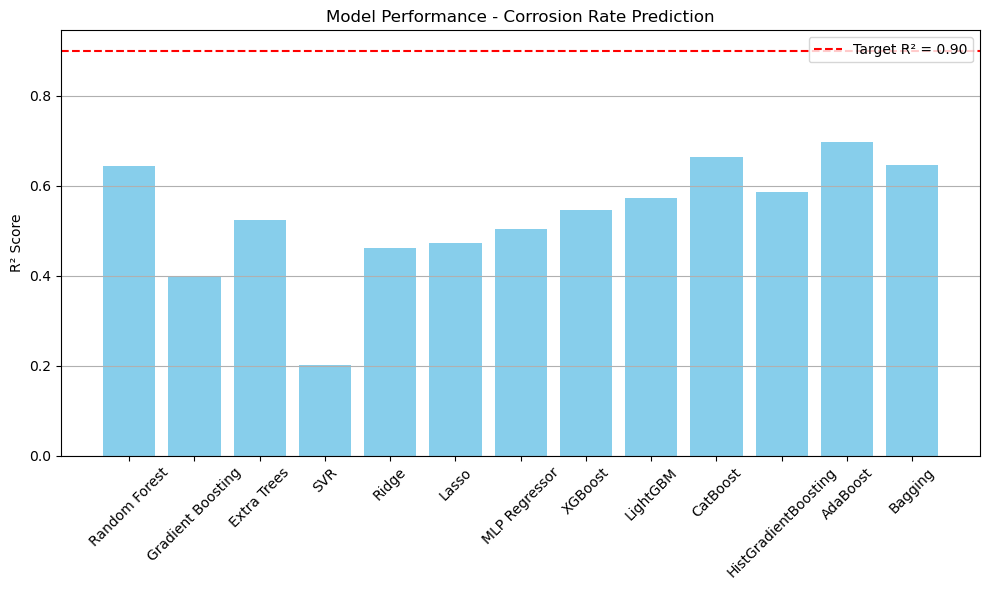


✅ Best Model: AdaBoostRegressor
🎯 Best R² Score: 0.6976


In [5]:
# 🚫 Suppress warnings
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn
# Install required packages if needed
!pip install xgboost lightgbm catboost imbalanced-learn

# Imports
from sklearn.ensemble import (
    RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,
    BaggingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# 📚 Imports
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import io
import matplotlib.pyplot as plt

# 📥 Load dataset

# 🧹 Drop constant columns
constant_cols = df.nunique()[df.nunique() == 1].index.tolist()
df = df.drop(columns=constant_cols)

# 🎯 Separate features and target
X = df[['CHLORIDE','RH_MIN','T_AVE','Si', 'Mn', 'P', 'S', 'Cu', 'Cr', 'Ni','SUNSHINE','PRECIPIT','SO2','TIME']]

y = df['Corrosion rate']

# 🧩 Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 🔄 Scale features & target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1)).ravel()

# 🚂 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 🧠 Models to try
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma='scale'),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,100), max_iter=2000, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=400, learning_rate=0.1, reg_lambda=0.5, random_state=42),
    "LightGBM": lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=500, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=300, learning_rate=0.05, depth=6, verbose=0, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=300, learning_rate=0.05, max_depth=6, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "Bagging": BaggingRegressor(n_estimators=200, random_state=42)
}

# 🎯 Evaluate all models
results = {}
best_model = None
best_score = -np.inf

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    results[name] = score
    print(f"{name}: R² Score = {score:.4f}")
    if score > best_score:
        best_score = score
        best_model = model

# 📊 Plot results
plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.axhline(0.9, color='red', linestyle='--', label='Target R² = 0.90')
plt.xticks(rotation=45)
plt.ylabel("R² Score")
plt.title("Model Performance - Corrosion Rate Prediction")
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# ✅ Best Model Summary
print("\n✅ Best Model:", type(best_model).__name__)
print("🎯 Best R² Score:", round(best_score, 4))


Random Forest: R² = 0.6430 | MSE = 0.3010 | RMSE = 0.5487 | MAE = 0.3230
Gradient Boosting: R² = 0.3968 | MSE = 0.5086 | RMSE = 0.7131 | MAE = 0.3943
Extra Trees: R² = 0.5227 | MSE = 0.4024 | RMSE = 0.6344 | MAE = 0.3721
SVR: R² = 0.2014 | MSE = 0.6734 | RMSE = 0.8206 | MAE = 0.5075
Ridge: R² = 0.4602 | MSE = 0.4551 | RMSE = 0.6746 | MAE = 0.4752
Lasso: R² = 0.4724 | MSE = 0.4448 | RMSE = 0.6670 | MAE = 0.4609
MLP Regressor: R² = 0.5038 | MSE = 0.4183 | RMSE = 0.6468 | MAE = 0.3980
XGBoost: R² = 0.5459 | MSE = 0.3829 | RMSE = 0.6188 | MAE = 0.3373
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 244, number of used features: 14
[LightGBM] [Info] Start training from score 0.000559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

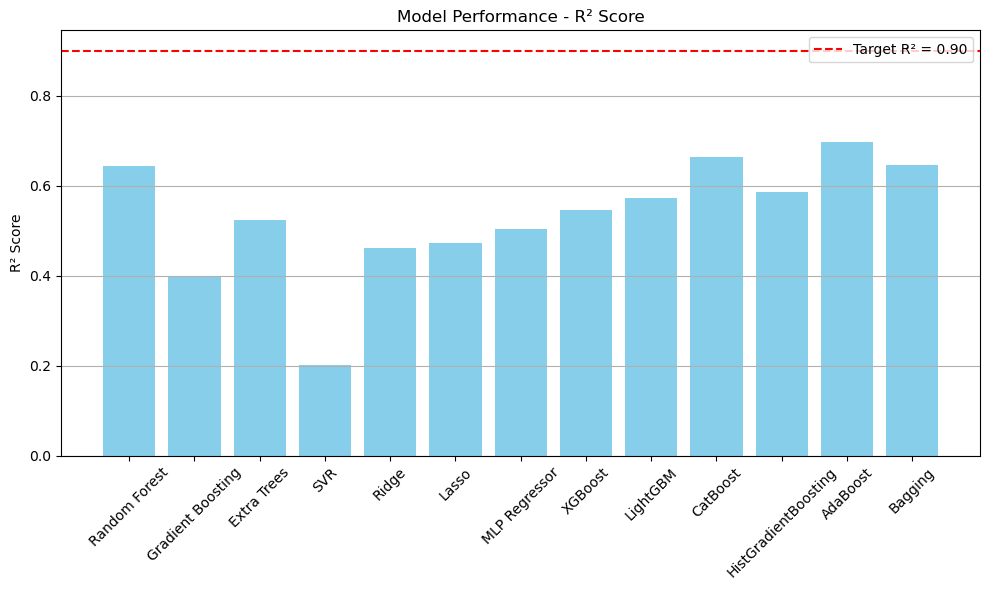

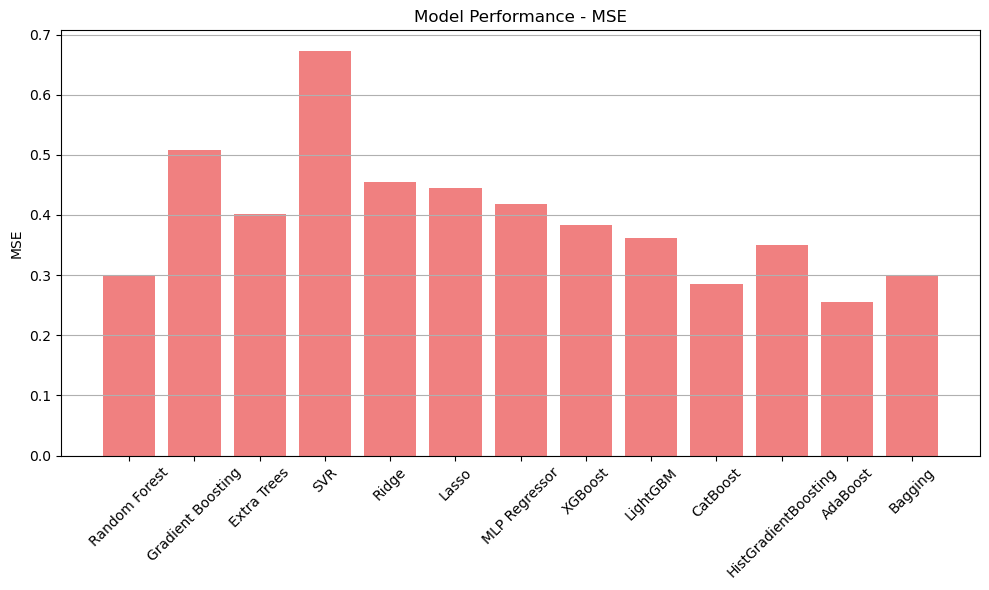

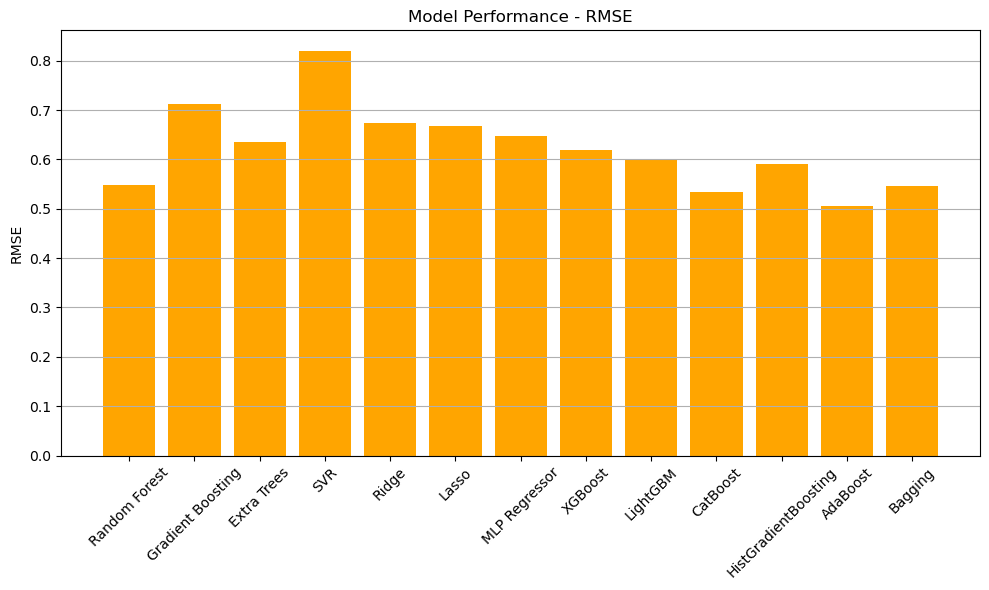

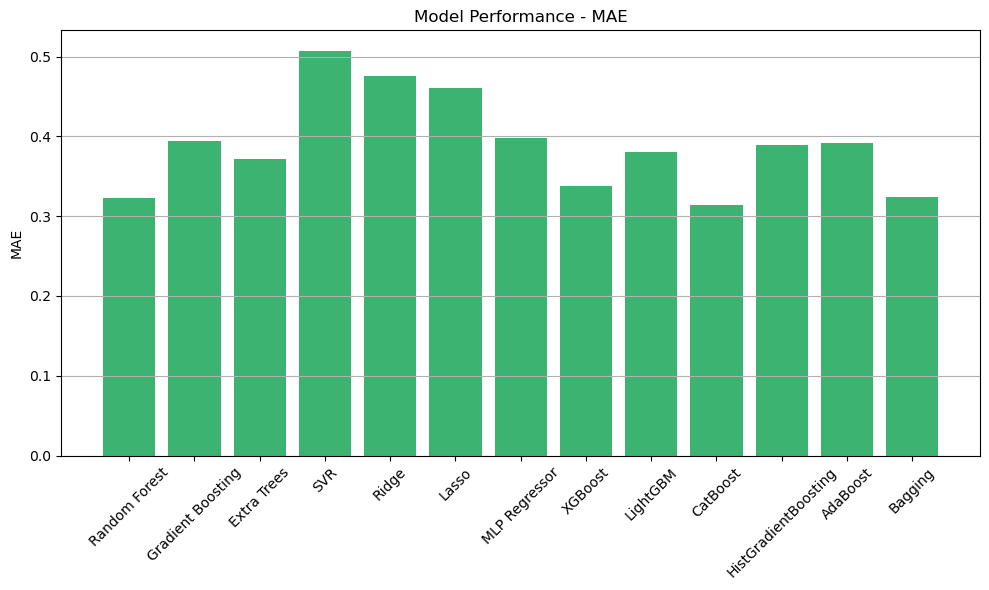


✅ Best Model: AdaBoostRegressor
🎯 Best R² Score: 0.6976


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize dictionaries for each metric
r2_scores = {}
rmse_scores = {}
mse_scores = {}
mae_scores = {}

# Track best model
best_model = None
best_r2 = -np.inf

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    r2_scores[name] = r2
    mse_scores[name] = mse
    rmse_scores[name] = rmse
    mae_scores[name] = mae

    print(f"{name}: R² = {r2:.4f} | MSE = {mse:.4f} | RMSE = {rmse:.4f} | MAE = {mae:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model

# 📊 Plotting results
def plot_metric(metric_dict, title, ylabel, color='skyblue'):
    plt.figure(figsize=(10, 6))
    plt.bar(metric_dict.keys(), metric_dict.values(), color=color)
    if ylabel == "R² Score":
        plt.axhline(0.9, color='red', linestyle='--', label='Target R² = 0.90')
        plt.legend()
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Plot all metrics
plot_metric(r2_scores, "Model Performance - R² Score", "R² Score")
plot_metric(mse_scores, "Model Performance - MSE", "MSE", color='lightcoral')
plot_metric(rmse_scores, "Model Performance - RMSE", "RMSE", color='orange')
plot_metric(mae_scores, "Model Performance - MAE", "MAE", color='mediumseagreen')

# ✅ Best Model Summary
print("\n✅ Best Model:", type(best_model).__name__)
print("🎯 Best R² Score:", round(best_r2, 4))


In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,50), (100,), (100, 100), (150, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [1e-5, 1e-4, 1e-3],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500 ,1000, 2000],
}

# Set up search
mlp = MLPRegressor(random_state=42)
search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=20,
                            scoring='r2', cv=5, random_state=42, verbose=2, n_jobs=-1)

# Run tuning
search.fit(X_scaled, y_scaled)

# Best model
best_mlp = search.best_estimator_
y_pred = best_mlp.predict(X_test)
mlp_r2 = r2_score(y_test, y_pred)

# Report
print("\n🎯 Best MLP R² Score (after tuning):", round(mlp_r2, 4))
print("🔧 Best Hyperparameters:", search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/User


🎯 Best MLP R² Score (after tuning): 0.9775
🔧 Best Hyperparameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (150, 100), 'alpha': 0.001, 'activation': 'relu'}


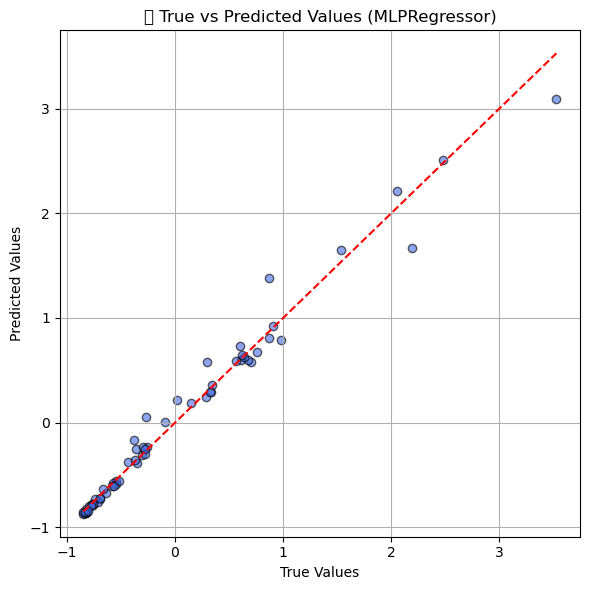

In [8]:
import matplotlib.pyplot as plt

# True vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("🎯 True vs Predicted Values (MLPRegressor)")
plt.grid(True)
plt.tight_layout()
plt.show()


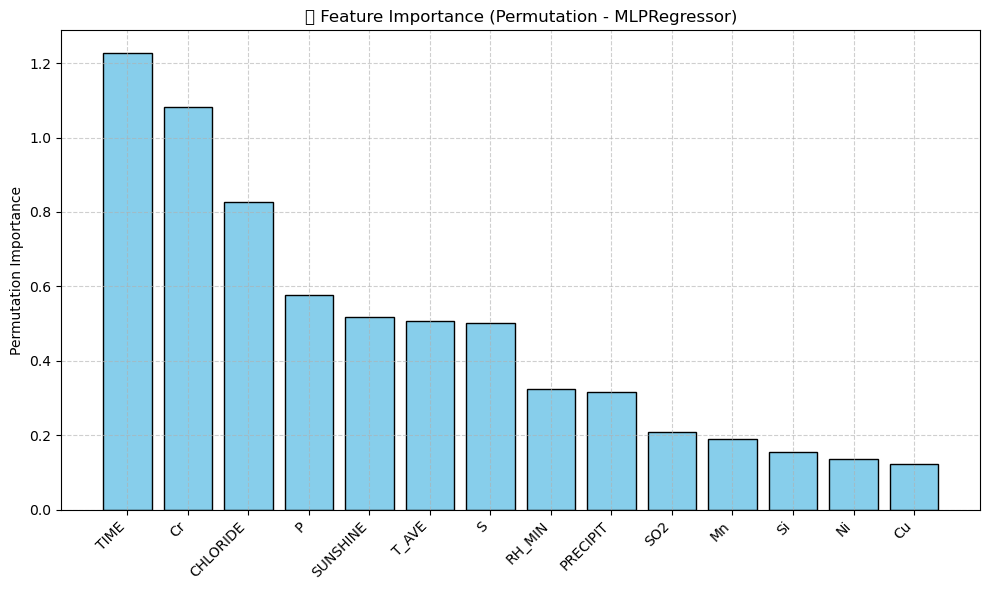

In [9]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV (if not already done)

# Define the list of feature columns used for X
X = df[['CHLORIDE','RH_MIN','T_AVE','Si', 'Mn', 'P', 'S', 'Cu', 'Cr', 'Ni','SUNSHINE','PRECIPIT','SO2','TIME']]

feature_names = X.columns

# Compute permutation importance
result = permutation_importance(best_mlp, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Sort features by importance
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center", color='skyblue', edgecolor='k')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Permutation Importance")
plt.title("📌 Feature Importance (Permutation - MLPRegressor)")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


  0%|          | 0/62 [00:00<?, ?it/s]

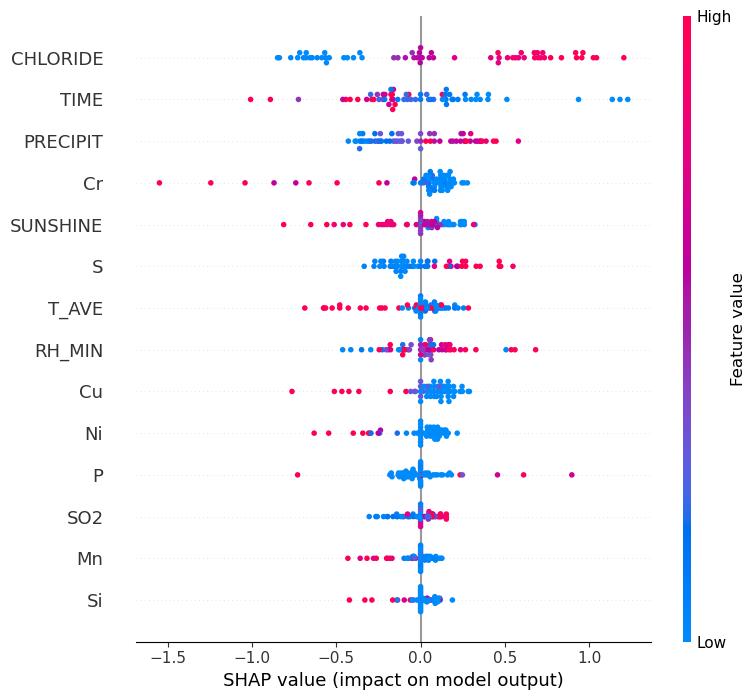

In [10]:
import shap
import pandas as pd

# Use a small subset for speed (optional)
X_sample = X_test  # or fewer if it's slow

# Initialize KernelExplainer with a background dataset
explainer = shap.KernelExplainer(best_mlp.predict, shap.sample(X_train, 100, random_state=42))

# Compute SHAP values
shap_values = explainer.shap_values(X_sample, nsamples=100)

# Create SHAP summary plot
shap.summary_plot(shap_values, X_sample, feature_names=feature_names)
